In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr, spearmanr

In [80]:
salary = pd.read_csv("us_salary_cleaned.csv")

In [81]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
1,2020,EN,1,Data Analyst,Analyst,72000,USD,72000,US,100,US,L,3,-0.597373
2,2020,SE,3,Lead Data Scientist,Scientist,190000,USD,190000,US,100,US,S,1,1.102490
3,2020,MI,2,Business Data Analyst,Analyst,135000,USD,135000,US,100,US,L,3,0.310181
4,2020,MI,2,Lead Data Analyst,Analyst,87000,USD,87000,US,100,US,L,3,-0.381289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
331,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
332,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
333,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


In [82]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           335 non-null    int64  
 1   experience_level    335 non-null    object 
 2   exp_grade           335 non-null    int64  
 3   job_title           335 non-null    object 
 4   job_type            335 non-null    object 
 5   salary              335 non-null    int64  
 6   salary_currency     335 non-null    object 
 7   salary_in_usd       335 non-null    int64  
 8   employee_residence  335 non-null    object 
 9   remote_ratio        335 non-null    int64  
 10  company_location    335 non-null    object 
 11  company_size        335 non-null    object 
 12  comp_size_grade     335 non-null    int64  
 13  usd_salary_zscore   335 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 36.8+ KB


In [83]:
sns.set()

In [84]:
sns.set_style('whitegrid')

## Summary Statistics for Numerical Variables

### Work Year

In [85]:
salary.work_year.describe()

count     335.000000
mean     2021.588060
std         0.626635
min      2020.000000
25%      2021.000000
50%      2022.000000
75%      2022.000000
max      2022.000000
Name: work_year, dtype: float64

Text(0.5, 0, 'Work Year')

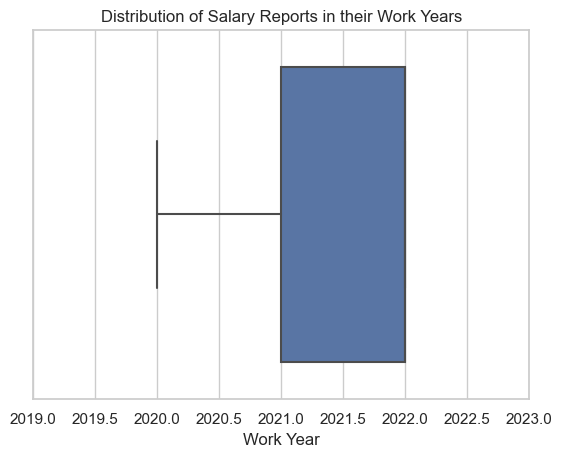

In [86]:
sns.boxplot(x = salary.work_year)
plt.xlim(2019, 2023)
plt.title('Distribution of Salary Reports in their Work Years')
plt.xlabel('Work Year')

In [87]:
salary.work_year.mean()

2021.5880597014925

In [88]:
salary.work_year.median()

2022.0

In [89]:
salary.work_year.min()

2020

In [90]:
salary.work_year.max()

2022

In [91]:
salary.work_year.std()

0.6266349604598878

WORK YEAR

- mean: 2021.4448398576512
- median:  2022
- min: 2020
- max: 2022
- standard deviation: 0.6791916601424964

### Experience (Grade Form)

In [92]:
salary.exp_grade.describe()

count    335.000000
mean       2.620896
std        0.689645
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: exp_grade, dtype: float64

Text(0.5, 0, 'Experience Level')

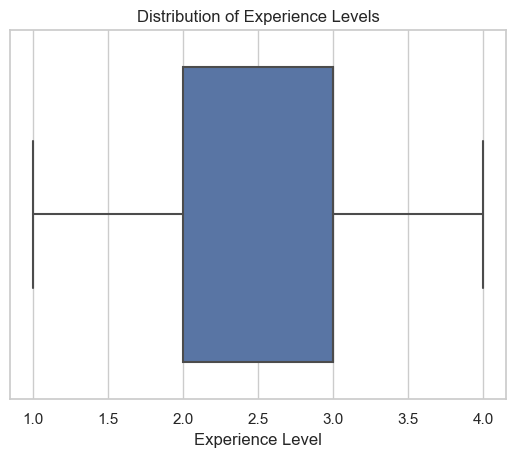

In [93]:
sns.boxplot(x = salary.exp_grade)
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')

In [94]:
salary.exp_grade.mean()

2.62089552238806

In [95]:
salary.exp_grade.median()

3.0

In [96]:
salary.exp_grade.min()

1

In [97]:
salary.exp_grade.max()

4

In [98]:
salary.exp_grade.std()

0.6896448173383808

EXPERIENCE LEVEL

- mean: 2.4395017793594307
- median: 3
- min: 1
- max: 4
- standard deviation: 0.7604800300539849

### Salary (USD)

In [99]:
salary.salary_in_usd.describe()

count       335.000000
mean     137626.683582
std       49258.719178
min       25000.000000
25%      101185.000000
50%      135000.000000
75%      168937.500000
max      276000.000000
Name: salary_in_usd, dtype: float64

Text(0.5, 0, 'Annual Salaries')

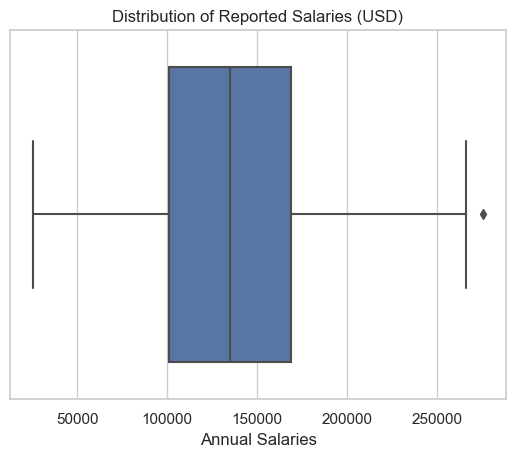

In [100]:
sns.boxplot(x = salary.salary_in_usd)
plt.title('Distribution of Reported Salaries (USD)')
plt.xlabel('Annual Salaries')

In [101]:
salary.salary_in_usd.mean()

137626.68358208955

In [102]:
salary.salary_in_usd.median()

135000.0

In [103]:
salary.salary_in_usd.min()

25000

In [104]:
salary.salary_in_usd.max()

276000

In [105]:
salary.salary_in_usd.std()

49258.7191782857

SALARY

- mean: 111,494.33096085409
- median: 104,945
- min: 16,228
- max: 276,000
- standard deviation: 55,957.96588047395

### Remote Ratio

In [106]:
salary.remote_ratio.describe()

count    335.000000
mean      77.164179
std       40.313367
min        0.000000
25%       50.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: remote_ratio, dtype: float64

Text(0.5, 0, 'Ratio of Working Remote')

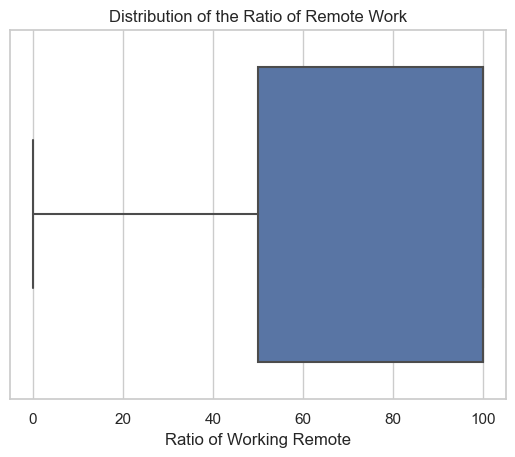

In [107]:
sns.boxplot(x = salary.remote_ratio)
plt.title('Distribution of the Ratio of Remote Work')
plt.xlabel('Ratio of Working Remote')

In [108]:
salary.remote_ratio.mean()

77.16417910447761

In [109]:
salary.remote_ratio.median()

100.0

In [110]:
salary.remote_ratio.min()

0

In [111]:
salary.remote_ratio.max()

100

In [112]:
salary.remote_ratio.std()

40.31336720366041

REMOTE RATIO

- mean: 71.08540925266904
- median: 100
- min: 0
- max: 100
- standard deviation: 40.77322835350361

### Company Size

In [113]:
salary.comp_size_grade.describe()

count    335.000000
mean       2.202985
std        0.569160
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: comp_size_grade, dtype: float64

Text(0.5, 0, 'Company Size')

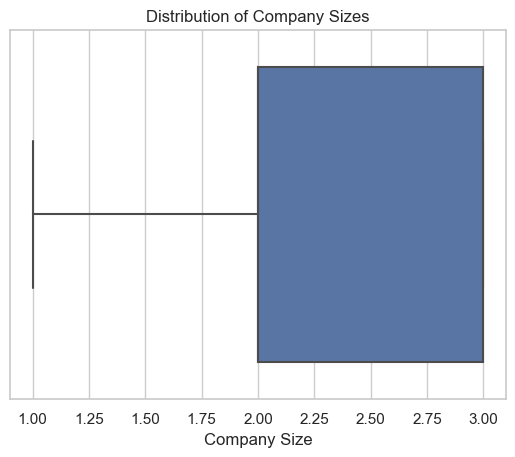

In [114]:
sns.boxplot(x = salary.comp_size_grade)
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')

In [115]:
salary.comp_size_grade.mean()

2.2029850746268655

In [116]:
salary.comp_size_grade.median()

2.0

In [117]:
salary.comp_size_grade.min()

1

In [118]:
salary.comp_size_grade.max()

3

In [119]:
salary.comp_size_grade.std()

0.5691600464361498

COMPANY SIZE

- mean: 2.197508896797153
- median: 2
- min: 1
- max: 3
- standard deviation: 0.6390117599328403

## Summary Statistics by Categories

In [120]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
1,2020,EN,1,Data Analyst,Analyst,72000,USD,72000,US,100,US,L,3,-0.597373
2,2020,SE,3,Lead Data Scientist,Scientist,190000,USD,190000,US,100,US,S,1,1.102490
3,2020,MI,2,Business Data Analyst,Analyst,135000,USD,135000,US,100,US,L,3,0.310181
4,2020,MI,2,Lead Data Analyst,Analyst,87000,USD,87000,US,100,US,L,3,-0.381289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
331,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
332,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
333,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


#### Work Year

In [121]:
salary.groupby(salary.work_year).describe()

exp_grade                                              salary  \
              count      mean       std  min  25%  50%  75%  max  count   
work_year                                                                 
2020           25.0  2.000000  0.707107  1.0  2.0  2.0  2.0  3.0   25.0   
2021           88.0  2.261364  0.809347  1.0  2.0  2.0  3.0  4.0   88.0   
2022          222.0  2.833333  0.515959  1.0  3.0  3.0  3.0  4.0  222.0   

                          ... comp_size_grade      usd_salary_zscore  \
                    mean  ...             75%  max             count   
work_year                 ...                                          
2020       117684.400000  ...             3.0  3.0              25.0   
2021       300787.784091  ...             3.0  3.0              88.0   
2022       143147.459459  ...             2.0  3.0             222.0   

                                                                       \
               mean       std       min       25%       50%       75%   
work_year                                                               
2020       0.065595  0.689026 -0.975377 -0.381289 -0.107582  0.353398   
2021       0.260813  0.815122 -1.259960 -0.338072  0.130110  0.814377   
2022       0.414392  0.656814 -1.274437 -0.041226  0.372125  0.814377   

                     
                max  
work_year            
2020       1.966827  
2021       2.341373  
2022       2.203079  

[3 rows x 48 columns]

Text(0, 0.5, 'Salary (USD)')

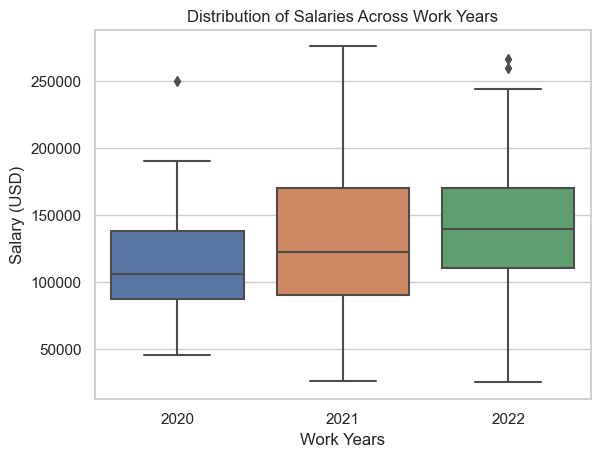

In [122]:
sns.boxplot(x = salary.work_year, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Work Years')
plt.xlabel('Work Years')
plt.ylabel('Salary (USD)')

### Experience Level

In [123]:
salary.groupby(salary.experience_level).describe()

work_year                                                  \
                     count         mean       std     min      25%     50%   
experience_level                                                             
EN                    28.0  2020.964286  0.637248  2020.0  2021.00  2021.0   
EX                    12.0  2021.750000  0.452267  2021.0  2021.75  2022.0   
MI                    83.0  2021.277108  0.720996  2020.0  2021.00  2021.0   
SE                   212.0  2021.783019  0.477051  2020.0  2022.00  2022.0   

                                 exp_grade       ... comp_size_grade       \
                     75%     max     count mean  ...             75%  max   
experience_level                                 ...                        
EN                2021.0  2022.0      28.0  1.0  ...            3.00  3.0   
EX                2022.0  2022.0      12.0  4.0  ...            2.25  3.0   
MI                2022.0  2022.0      83.0  2.0  ...            3.00  3.0   
SE                2022.0  2022.0     212.0  3.0  ...            2.00  3.0   

                 usd_salary_zscore                                          \
                             count      mean       std       min       25%   
experience_level                                                             
EN                            28.0 -0.213309  0.656002 -0.914297 -0.604576   
EX                            12.0  1.048319  0.692653 -0.049960  0.472244   
MI                            83.0  0.031882  0.634627 -1.259960 -0.359681   
SE                           212.0  0.506289  0.652902 -1.274437  0.032159   

                                                
                       50%       75%       max  
experience_level                                
EN               -0.338072 -0.067967  1.966827  
EX                1.066476  1.631896  1.966827  
MI               -0.024390  0.441992  1.837176  
SE                0.454237  0.958433  2.341373  

[4 rows x 56 columns]

Text(0, 0.5, 'Salary (USD)')

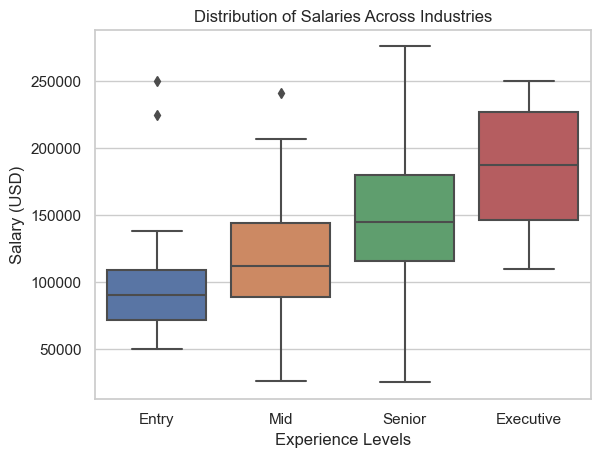

In [124]:
sns.boxplot(x = salary.exp_grade, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Industries')
plt.xticks([0, 1, 2, 3], ['Entry', 'Mid', 'Senior', 'Executive'])
plt.xlabel('Experience Levels')
plt.ylabel('Salary (USD)')

### Job Type

In [125]:
salary.groupby(salary.job_type).describe()

work_year                                                  \
                      count         mean       std     min      25%     50%   
job_type                                                                      
Analyst                81.0  2021.629630  0.621378  2020.0  2021.00  2022.0   
Architect               9.0  2021.666667  0.500000  2021.0  2021.00  2022.0   
Consultant              2.0  2020.500000  0.707107  2020.0  2020.25  2020.5   
Engineer              117.0  2021.589744  0.631826  2020.0  2021.00  2022.0   
Manager/Executive      27.0  2021.407407  0.572394  2020.0  2021.00  2021.0   
Scientist              99.0  2021.616162  0.634181  2020.0  2021.00  2022.0   

                                   exp_grade            ... comp_size_grade  \
                       75%     max     count      mean  ...             75%   
job_type                                                ...                   
Analyst            2022.00  2022.0      81.0  2.592593  ...             2.0   
Architect          2022.00  2022.0       9.0  2.666667  ...             3.0   
Consultant         2020.75  2021.0       2.0  1.500000  ...             2.5   
Engineer           2022.00  2022.0     117.0  2.649573  ...             3.0   
Manager/Executive  2022.00  2022.0      27.0  3.037037  ...             3.0   
Scientist          2022.00  2022.0      99.0  2.515152  ...             3.0   

                       usd_salary_zscore                                \
                   max             count      mean       std       min   
job_type                                                                 
Analyst            3.0              81.0 -0.079105  0.482249 -1.112244   
Architect          3.0               9.0  1.044088  0.569470  0.452134   
Consultant         3.0               2.0 -0.244436  0.132422 -0.338072   
Engineer           3.0             117.0  0.450355  0.735317 -1.274437   
Manager/Executive  3.0              27.0  0.716788  0.687646 -0.855320   
Scientist          3.0              99.0  0.424660  0.689801 -1.081402   

                                                           
                        25%       50%       75%       max  
job_type                                                   
Analyst           -0.381289 -0.121988  0.223747  1.246546  
Architect          0.526265  0.958433  1.372955  2.203079  
Consultant        -0.291254 -0.244436 -0.197617 -0.150799  
Engineer          -0.049960  0.454237  1.010294  2.341373  
Manager/Executive  0.361616  0.569482  1.175958  1.966827  
Scientist          0.002621  0.382209  0.857594  2.110883  

[6 rows x 56 columns]

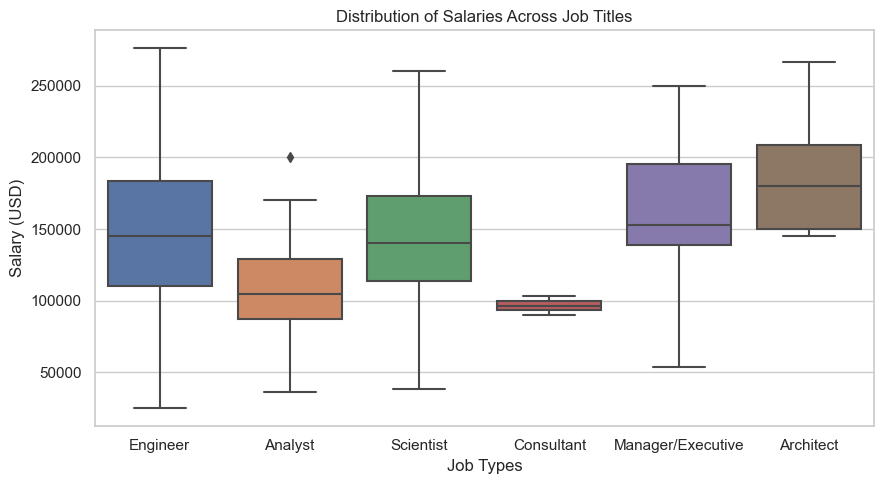

In [126]:
plt.figure(figsize=(9,5))
sns.boxplot(x = salary.job_type, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Job Titles')
plt.xlabel('Job Types')
plt.ylabel('Salary (USD)')
plt.tight_layout()

### Remote Ratio

In [127]:
salary.groupby(salary.remote_ratio).describe()

work_year                                                         \
                 count         mean       std     min     25%     50%     75%   
remote_ratio                                                                    
0                 67.0  2021.731343  0.479333  2020.0  2021.5  2022.0  2022.0   
50                19.0  2021.052632  0.621261  2020.0  2021.0  2021.0  2021.0   
100              249.0  2021.590361  0.642001  2020.0  2021.0  2022.0  2022.0   

                     exp_grade            ... comp_size_grade       \
                 max     count      mean  ...             75%  max   
remote_ratio                              ...                        
0             2022.0      67.0  2.641791  ...             3.0  3.0   
50            2022.0      19.0  2.105263  ...             3.0  3.0   
100           2022.0     249.0  2.654618  ...             2.0  3.0   

             usd_salary_zscore                                          \
                         count      mean       std       min       25%   
remote_ratio                                                             
0                         67.0  0.309102  0.759908 -1.259960 -0.208422   
50                        19.0  0.036921  0.790209 -1.112244 -0.633387   
100                      249.0  0.382230  0.685674 -1.274437 -0.121988   

                                            
                   50%       75%       max  
remote_ratio                                
0             0.223747  0.742320  2.341373  
50            0.094096  0.504657  1.966827  
100           0.341023  0.814377  2.203079  

[3 rows x 48 columns]

In [128]:
salary.groupby(salary.remote_ratio).salary_in_usd.describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,67.0,134925.089552,52750.822386,26005.0,99000.0,129000.0,164998.0,276000.0
50,19.0,116031.000000,54854.215555,36259.0,69500.0,120000.0,148500.0,250000.0
100,249.0,140001.481928,47597.683535,25000.0,105000.0,137141.0,170000.0,266400.0


Text(0, 0.5, 'Salary (USD)')

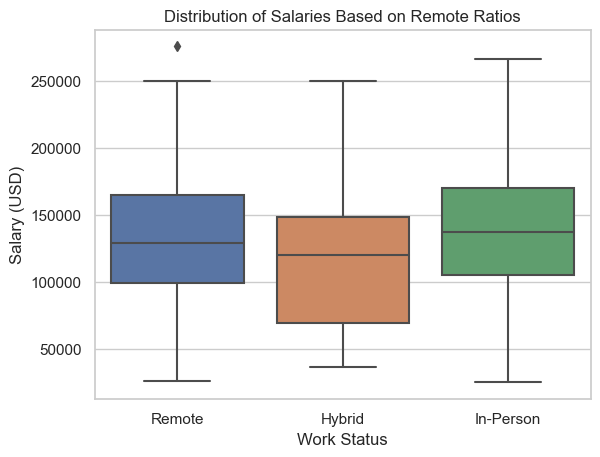

In [129]:
sns.boxplot(x = salary.remote_ratio, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Based on Remote Ratios')
plt.xticks([0, 1, 2], ['Remote', 'Hybrid', 'In-Person'])
plt.xlabel('Work Status')
plt.ylabel('Salary (USD)')

### Company Size

In [130]:
salary.groupby(salary.company_size).describe()

work_year                                                         \
                 count         mean       std     min     25%     50%     75%   
company_size                                                                    
L                 95.0  2021.126316  0.656264  2020.0  2021.0  2021.0  2022.0   
M                213.0  2021.863850  0.418057  2020.0  2022.0  2022.0  2022.0   
S                 27.0  2021.037037  0.587137  2020.0  2021.0  2021.0  2021.0   

                     exp_grade            ... comp_size_grade       \
                 max     count      mean  ...             75%  max   
company_size                              ...                        
L             2022.0      95.0  2.410526  ...             3.0  3.0   
M             2022.0     213.0  2.807512  ...             2.0  2.0   
S             2022.0      27.0  1.888889  ...             1.0  1.0   

             usd_salary_zscore                                          \
                         count      mean       std       min       25%   
company_size                                                             
L                         95.0  0.414435  0.779135 -1.259960 -0.136393   
M                        213.0  0.383860  0.653844 -1.274437 -0.103837   
S                         27.0 -0.168403  0.695928 -0.975377 -0.734227   

                                            
                   50%       75%       max  
company_size                                
L             0.439831  0.958433  2.341373  
M             0.324586  0.771160  2.203079  
S            -0.338072  0.094096  2.053260  

[3 rows x 56 columns]

Text(0, 0.5, 'Salary (USD)')

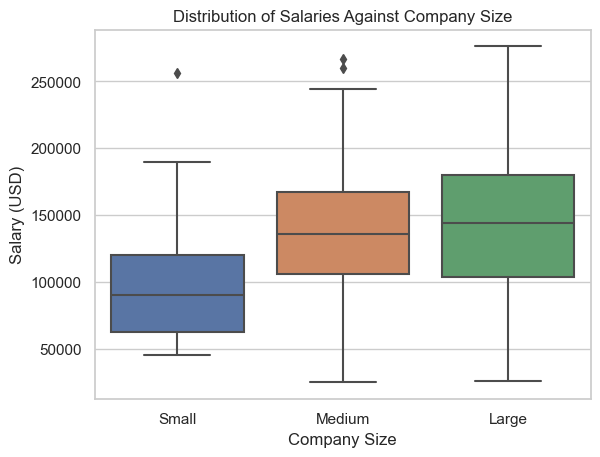

In [131]:
sns.boxplot(x = salary.comp_size_grade, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Against Company Size')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

## Comparing Categorical Variables and Finding Relationships to Answer Questions

In [132]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
1,2020,EN,1,Data Analyst,Analyst,72000,USD,72000,US,100,US,L,3,-0.597373
2,2020,SE,3,Lead Data Scientist,Scientist,190000,USD,190000,US,100,US,S,1,1.102490
3,2020,MI,2,Business Data Analyst,Analyst,135000,USD,135000,US,100,US,L,3,0.310181
4,2020,MI,2,Lead Data Analyst,Analyst,87000,USD,87000,US,100,US,L,3,-0.381289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
331,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
332,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
333,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


In [133]:
salary.salary_in_usd.groupby(salary.job_type).describe()

,count,mean,std,min,25%,50%,75%,max
job_type,,,,,,,,
Analyst,81.0,107976.839506,33476.461326,36259.0,87000.0,105000.0,129000.0,200000.0
Architect,9.0,185945.888889,39531.076517,144854.0,150000.0,180000.0,208775.0,266400.0
Consultant,2.0,96500.000000,9192.388155,90000.0,93250.0,96500.0,99750.0,103000.0
Engineer,117.0,144730.529915,51043.802353,25000.0,110000.0,145000.0,183600.0,276000.0
Manager/Executive,27.0,163225.629630,47734.578972,54094.0,138570.5,153000.0,195100.0,250000.0
Scientist,99.0,142946.848485,47884.157216,38400.0,113650.0,140000.0,173000.0,260000.0


Text(0, 0.5, 'Salary (USD)')

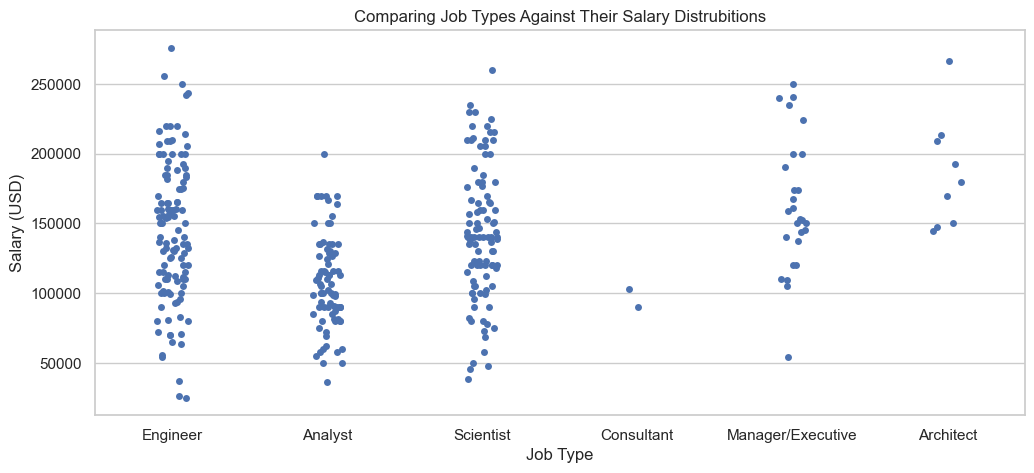

In [134]:
plt.figure(figsize=(12,5))
sns.stripplot(x = salary.job_type, y = salary.salary_in_usd)
plt.title('Comparing Job Types Against Their Salary Distrubitions')
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')

Text(0, 0.5, 'Salary (USD)')

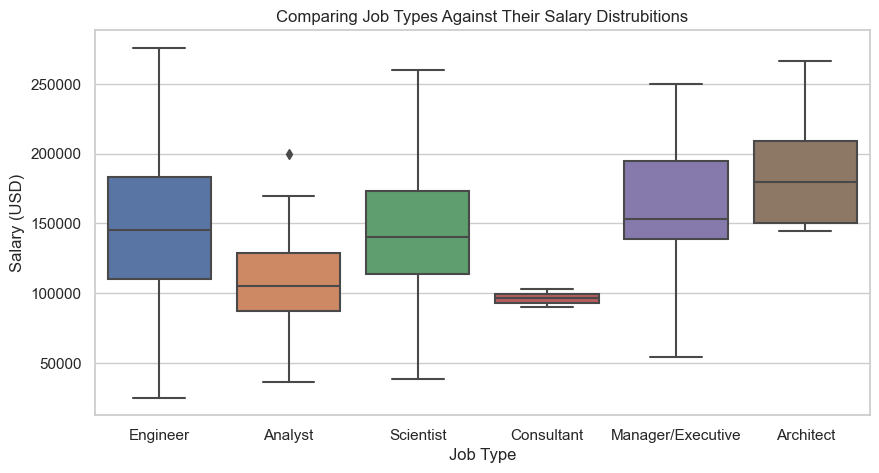

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x = salary.job_type, y = salary.salary_in_usd)
plt.title('Comparing Job Types Against Their Salary Distrubitions')
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')

In [136]:
salary.remote_ratio.groupby(salary.job_type).describe()

,count,mean,std,min,25%,50%,75%,max
job_type,,,,,,,,
Analyst,81.0,79.629630,39.352397,0.0,100.0,100.0,100.0,100.0
Architect,9.0,100.000000,0.000000,100.0,100.0,100.0,100.0,100.0
Consultant,2.0,100.000000,0.000000,100.0,100.0,100.0,100.0,100.0
Engineer,117.0,75.213675,41.845329,0.0,50.0,100.0,100.0,100.0
Manager/Executive,27.0,79.629630,39.853721,0.0,100.0,100.0,100.0,100.0
Scientist,99.0,74.242424,41.258046,0.0,50.0,100.0,100.0,100.0


In [137]:
pd.crosstab(index = salary.job_type, columns = salary.remote_ratio)

remote_ratio,0,50,100
job_type,,,
Analyst,15,3,63
Architect,0,0,9
Consultant,0,0,2
Engineer,26,6,85
Manager/Executive,5,1,21
Scientist,21,9,69


Text(0, 0.5, 'Remote Ratios')

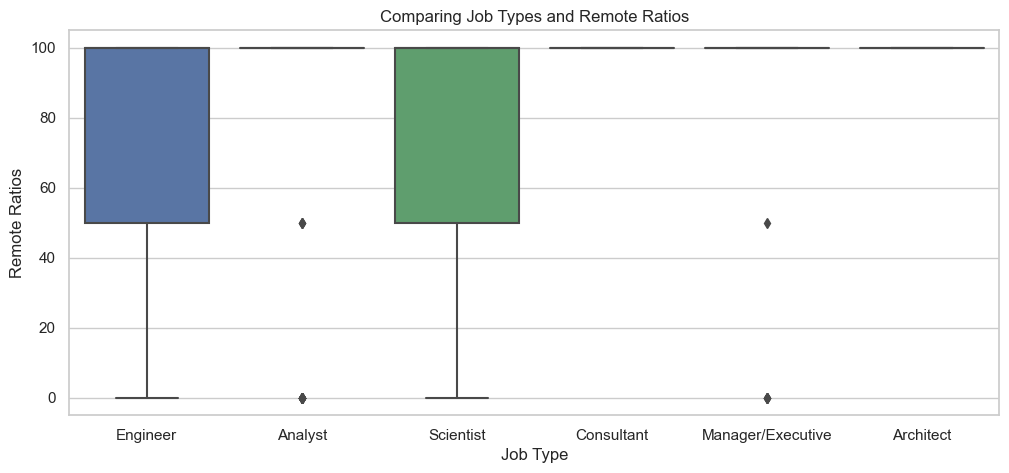

In [138]:
plt.figure(figsize=(12,5))
sns.boxplot(x = salary.job_type, y = salary.remote_ratio)
plt.title('Comparing Job Types and Remote Ratios')
plt.xlabel('Job Type')
plt.ylabel('Remote Ratios')

<AxesSubplot:xlabel='job_type', ylabel='remote_ratio'>

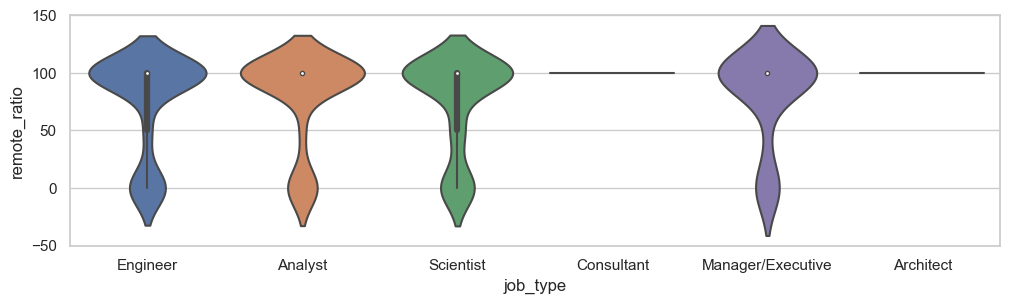

In [139]:
plt.figure(figsize=(12,3))
sns.violinplot(x = salary.job_type, y = salary.remote_ratio)

In [140]:
salary.salary_in_usd.groupby(salary.remote_ratio).describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,67.0,134925.089552,52750.822386,26005.0,99000.0,129000.0,164998.0,276000.0
50,19.0,116031.000000,54854.215555,36259.0,69500.0,120000.0,148500.0,250000.0
100,249.0,140001.481928,47597.683535,25000.0,105000.0,137141.0,170000.0,266400.0


Text(0, 0.5, 'Salary (USD)')

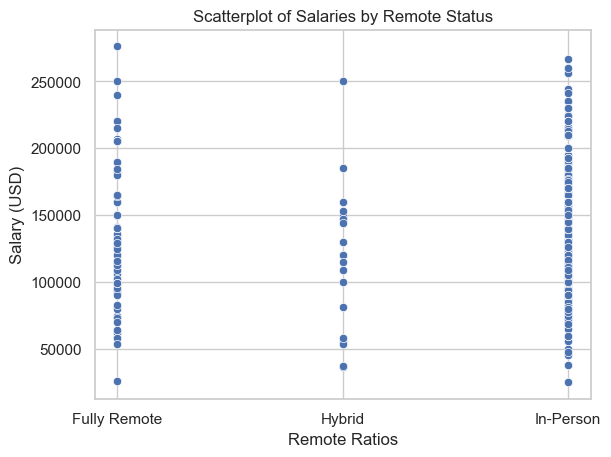

In [141]:
sns.scatterplot(x = salary.remote_ratio, y = salary.salary_in_usd)
plt.title('Scatterplot of Salaries by Remote Status')
plt.xticks([0, 50, 100], ['Fully Remote', 'Hybrid', 'In-Person'])
plt.xlabel('Remote Ratios')
plt.ylabel('Salary (USD)')

In [142]:
salary.drop(columns = ['usd_salary_zscore'], inplace = True)

In [143]:
salary.corr()

,work_year,exp_grade,salary,salary_in_usd,remote_ratio,comp_size_grade
work_year,1.000000,0.434277,-0.054107,0.146753,-0.053493,-0.243346
exp_grade,0.434277,1.000000,-0.005792,0.404265,0.037676,-0.001685
salary,-0.054107,-0.005792,1.000000,-0.062531,-0.043792,0.112181
salary_in_usd,0.146753,0.404265,-0.062531,1.000000,0.058223,0.150138
remote_ratio,-0.053493,0.037676,-0.043792,0.058223,1.000000,-0.058349
comp_size_grade,-0.243346,-0.001685,0.112181,0.150138,-0.058349,1.000000


<AxesSubplot:>

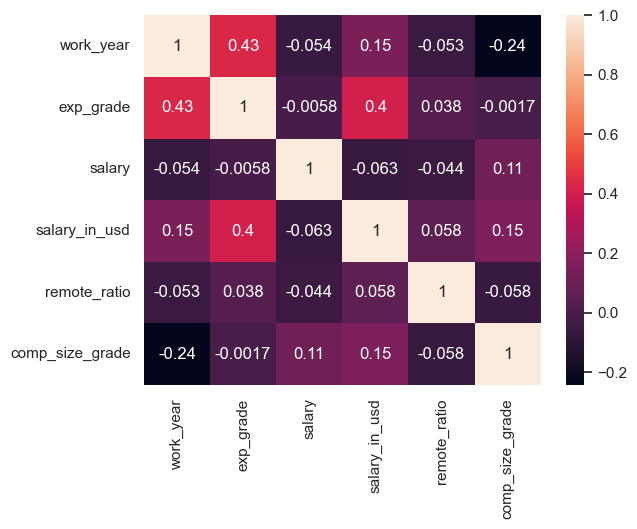

In [144]:
sns.heatmap(salary.corr(), annot = True)

In [145]:
salary.salary_in_usd.groupby(salary.company_size).describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,95.0,142237.073684,54085.469147,26005.0,104000.0,144000.0,180000.0,276000.0
M,213.0,140114.605634,45388.118998,25000.0,106260.0,136000.0,167000.0,266400.0
S,27.0,101778.000000,48309.486824,45760.0,62500.0,90000.0,120000.0,256000.0


Text(0, 0.5, 'Salary (USD)')

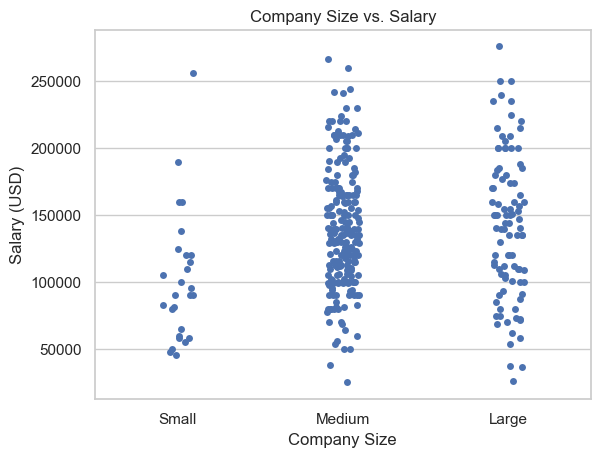

In [146]:
sns.stripplot(x = salary.comp_size_grade, y = salary.salary_in_usd)
plt.title('Company Size vs. Salary')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

Text(0, 0.5, 'Salary (USD)')

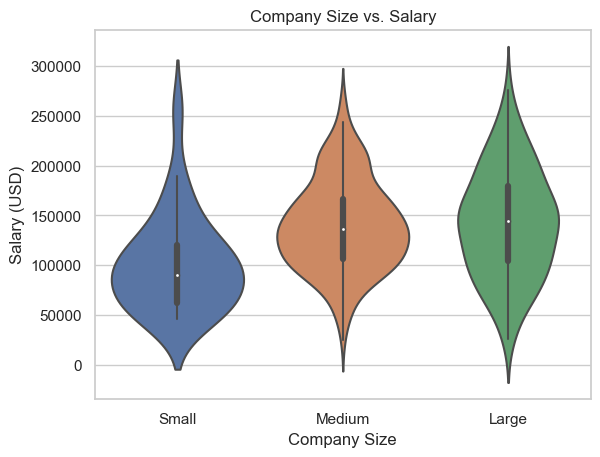

In [147]:
sns.violinplot(x = salary.comp_size_grade, y = salary.salary_in_usd)
plt.title('Company Size vs. Salary')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

In [148]:
salary.salary_in_usd.groupby(salary.experience_level).describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,28.0,98660.714286,45537.947865,50000.0,71500.0,90000.0,108750.0,250000.0
EX,12.0,186239.583333,48082.152068,110000.0,146250.0,187500.0,226750.0,250000.0
MI,83.0,115681.204819,44054.121845,26005.0,88500.0,111775.0,144150.0,241000.0
SE,212.0,148613.320755,45322.749337,25000.0,115700.5,145000.0,180000.0,276000.0


Text(0, 0.5, 'Salary (USD)')

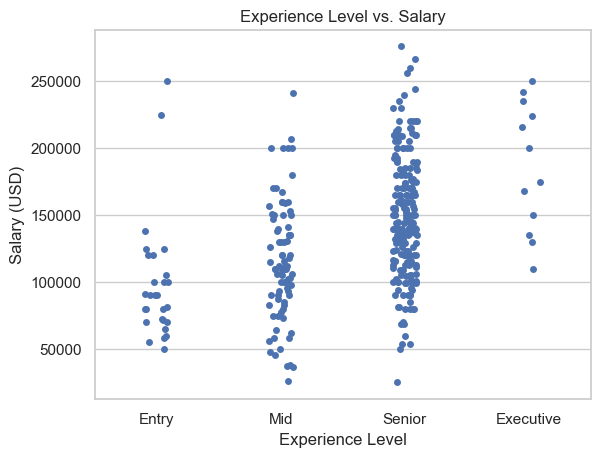

In [149]:
sns.stripplot(x = salary.exp_grade, y = salary.salary_in_usd)
plt.title('Experience Level vs. Salary')
plt.xticks([0, 1, 2, 3], ['Entry', 'Mid', 'Senior', 'Executive'])
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

## Correlation and P-Values

In [150]:
salary.corr()

,work_year,exp_grade,salary,salary_in_usd,remote_ratio,comp_size_grade
work_year,1.000000,0.434277,-0.054107,0.146753,-0.053493,-0.243346
exp_grade,0.434277,1.000000,-0.005792,0.404265,0.037676,-0.001685
salary,-0.054107,-0.005792,1.000000,-0.062531,-0.043792,0.112181
salary_in_usd,0.146753,0.404265,-0.062531,1.000000,0.058223,0.150138
remote_ratio,-0.053493,0.037676,-0.043792,0.058223,1.000000,-0.058349
comp_size_grade,-0.243346,-0.001685,0.112181,0.150138,-0.058349,1.000000


<AxesSubplot:>

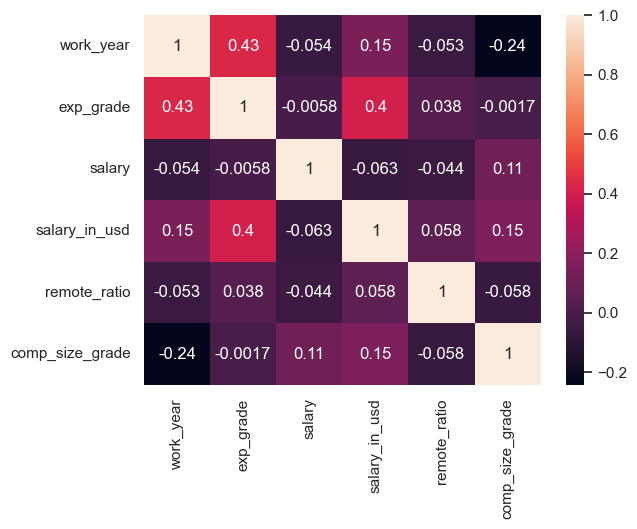

In [151]:
sns.heatmap(salary.corr(), annot = True)

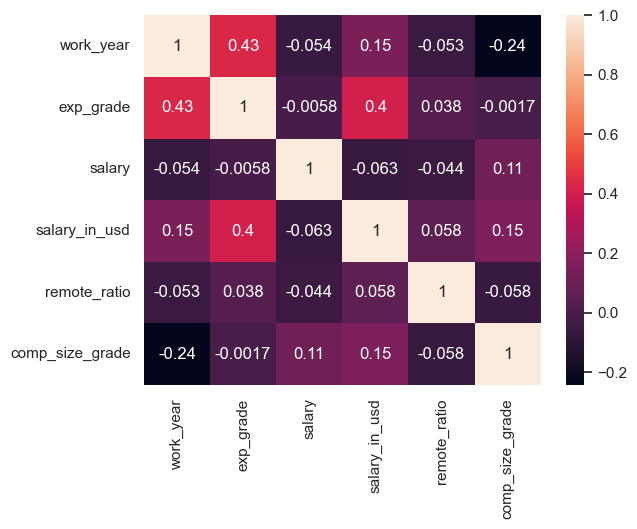

In [160]:
heatpic = sns.heatmap(salary.corr(), annot = True)
fig = heatpic.get_figure()
fig.savefig("corr.png") 

In [152]:
spearmanr(salary.salary_in_usd, salary.remote_ratio)

SpearmanrResult(correlation=0.0793821431691849, pvalue=0.147117140252568)

In [153]:
pearsonr(salary.salary_in_usd, salary.remote_ratio)

PearsonRResult(statistic=0.05822307594174793, pvalue=0.2879744050151773)

## Multivariate Analysis

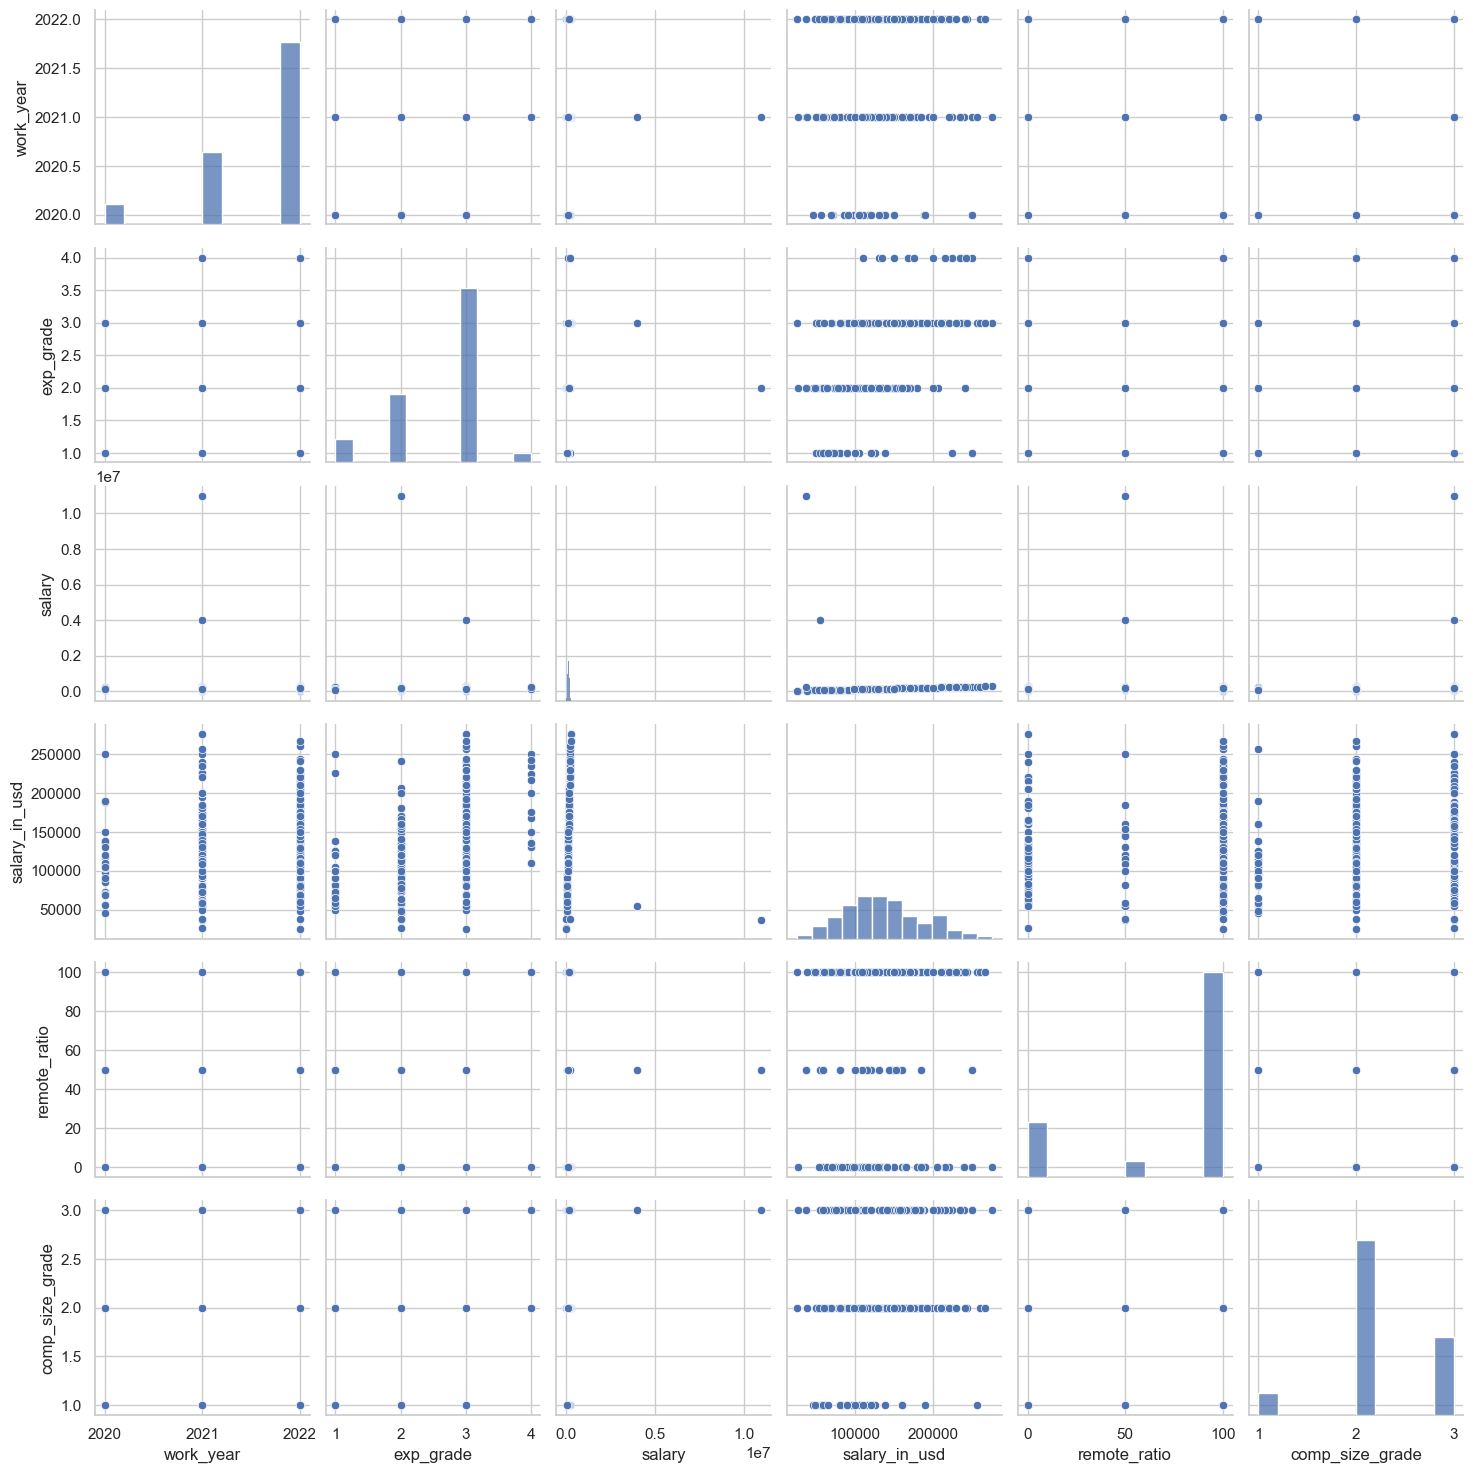

In [154]:
sns.pairplot(salary)

In [155]:
heatmap = pd.crosstab(index = salary.job_type, columns = salary.exp_grade, values = salary.salary_in_usd, aggfunc = np.mean).round(0)

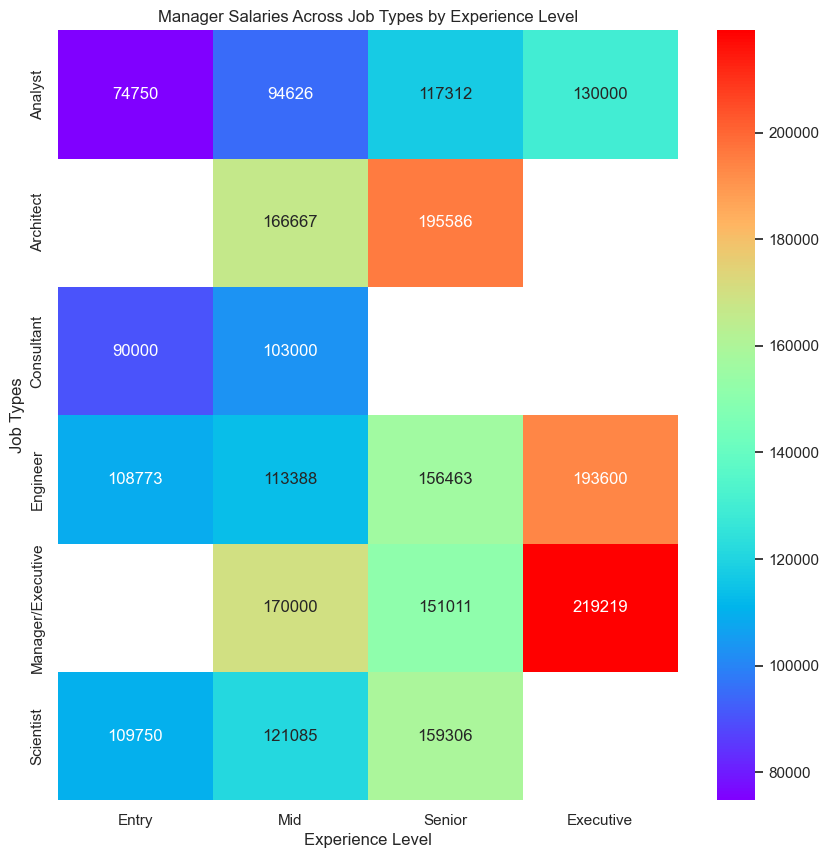

In [156]:
plt.figure(figsize=(10,10))

sns.heatmap(heatmap, annot = True, fmt = 'g', cmap = 'rainbow', xticklabels = ['Entry', 'Mid', "Senior", "Executive"])

plt.xlabel("Experience Level")
plt.ylabel("Job Types")

plt.title("Manager Salaries Across Job Types by Experience Level");